In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthcare-dataset/healthcare_dataset.csv


In [2]:
df=pd.read_csv('/kaggle/input/healthcare-dataset/healthcare_dataset.csv')
df.head(3)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [4]:
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

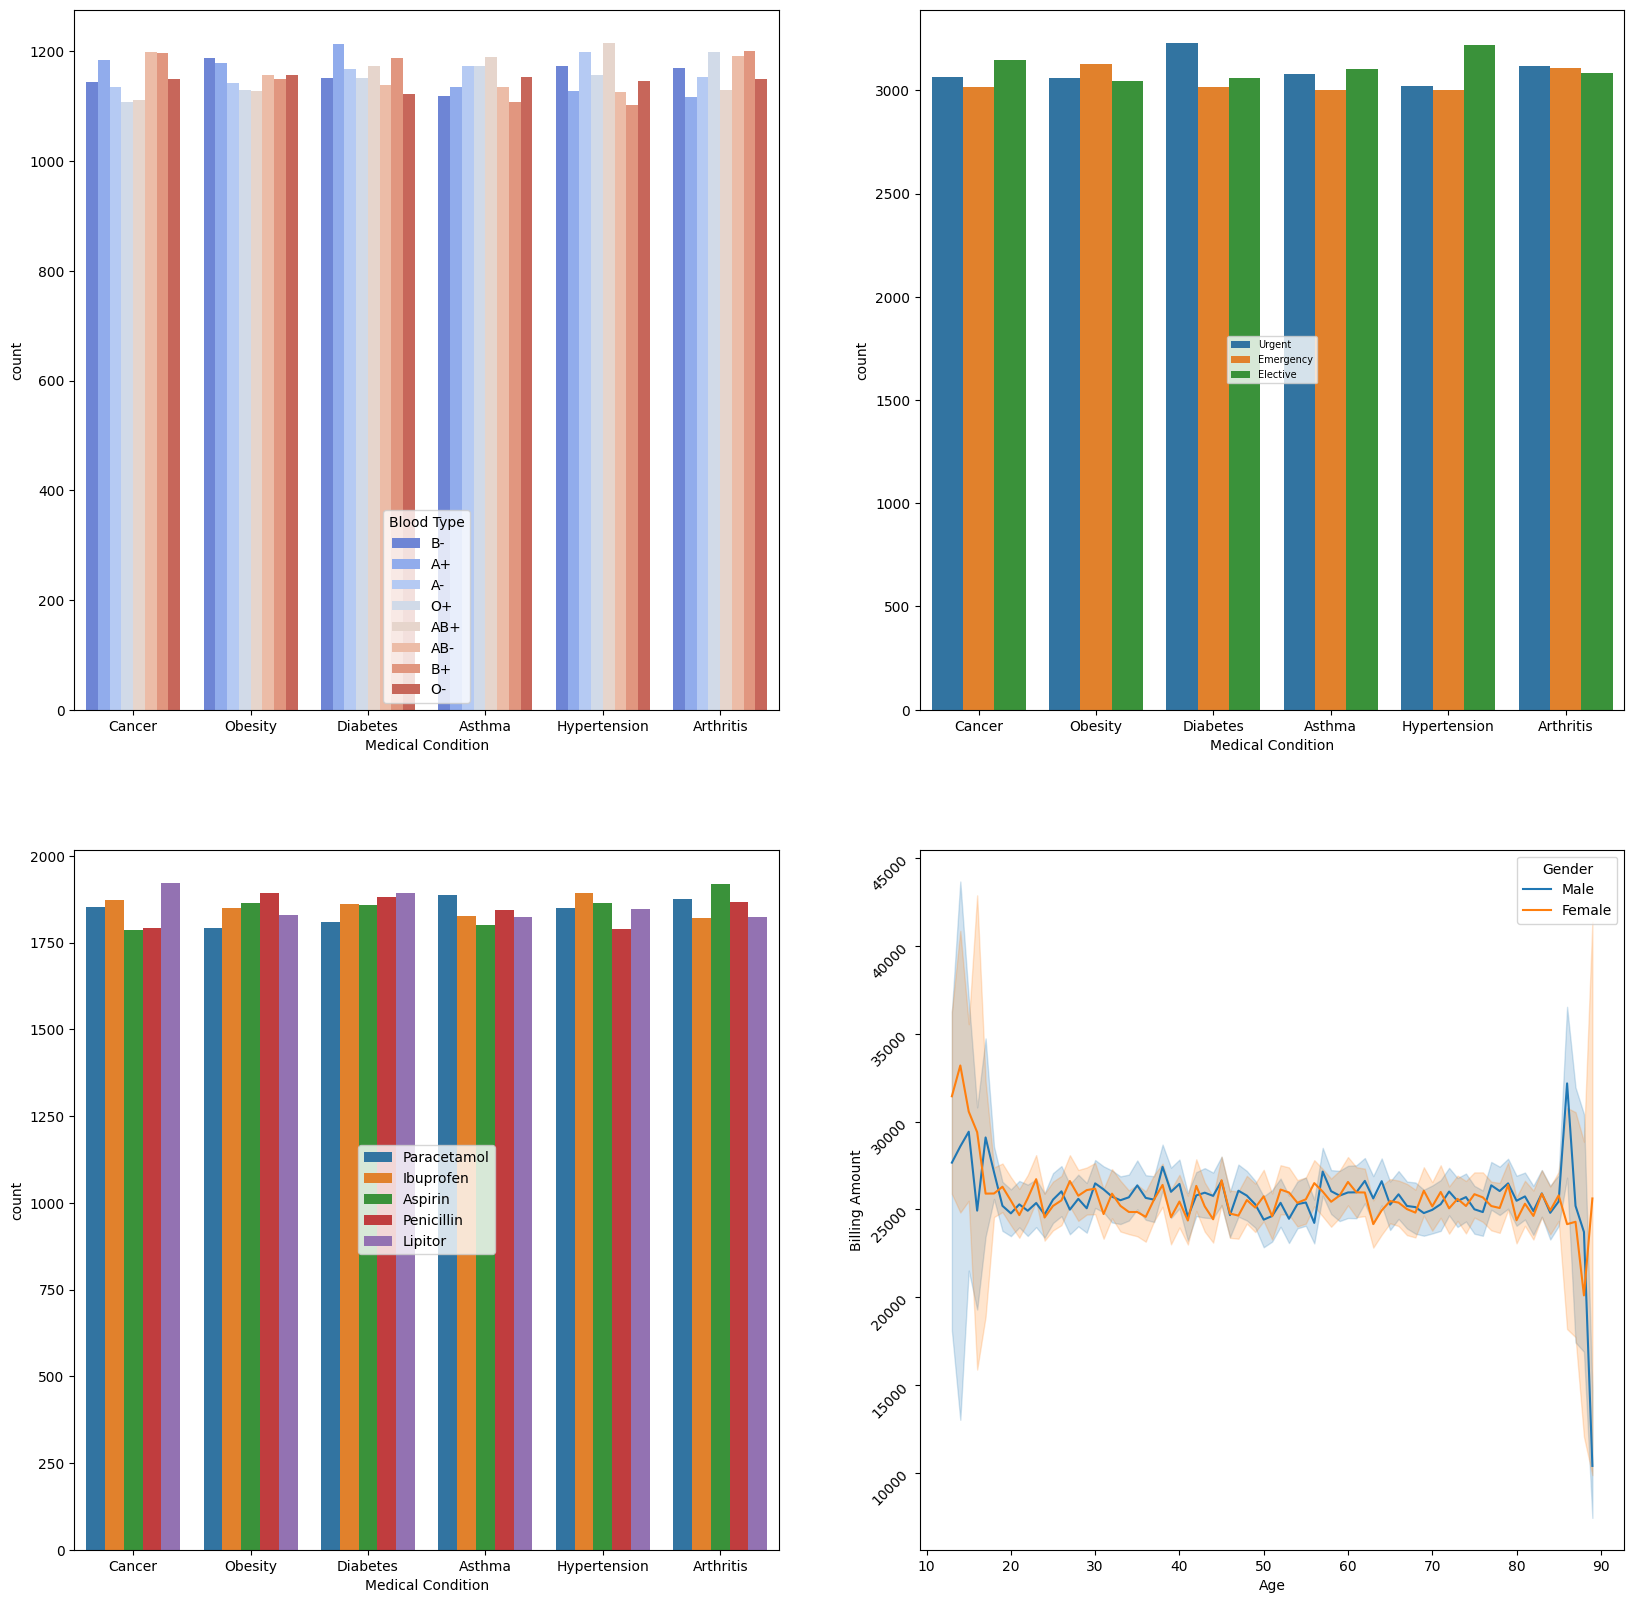

In [5]:
fig, ax=plt.subplots(2,2,figsize=(20,20))
sns.countplot(data=df,x='Medical Condition',palette='coolwarm',hue='Blood Type',ax=ax[0][0])
sns.countplot(data=df,x='Medical Condition',hue='Admission Type',ax=ax[0][1])
sns.countplot(data=df,x='Medical Condition',hue='Medication',ax=ax[1][0])
sns.lineplot(data=df,x='Age',y='Billing Amount',hue=df['Gender'],ax=ax[1][1])
plt.yticks(rotation=45)
ax[0][1].legend(loc='center',fontsize=7)
ax[1][0].legend(loc='center')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


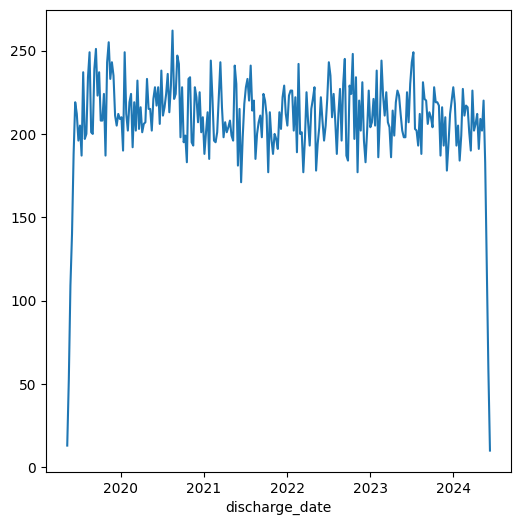

In [6]:
df.rename(columns={'Discharge Date':'discharge_date'},inplace=True)
df['discharge_date']=pd.to_datetime(df['discharge_date'])
df.set_index('discharge_date',inplace=True)
weekly_counts=df.resample('W').size()
plt.figure(figsize=(6,6))
sns.lineplot(x=weekly_counts.index,y=weekly_counts.values)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


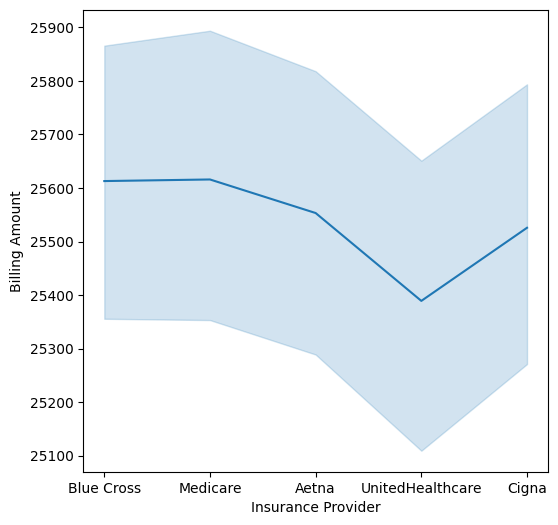

In [7]:
plt.figure(figsize=(6,6))
sns.lineplot(data=df,y=df['Billing Amount'],x=df['Insurance Provider'])
plt.show()

In [8]:
df.head(3)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results
discharge_date,,,,,,,,,,,,,,
2024-02-02,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,Paracetamol,Normal
2019-08-26,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,Ibuprofen,Inconclusive
2022-10-07,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,Aspirin,Normal


In [9]:
df.reset_index(inplace=True)

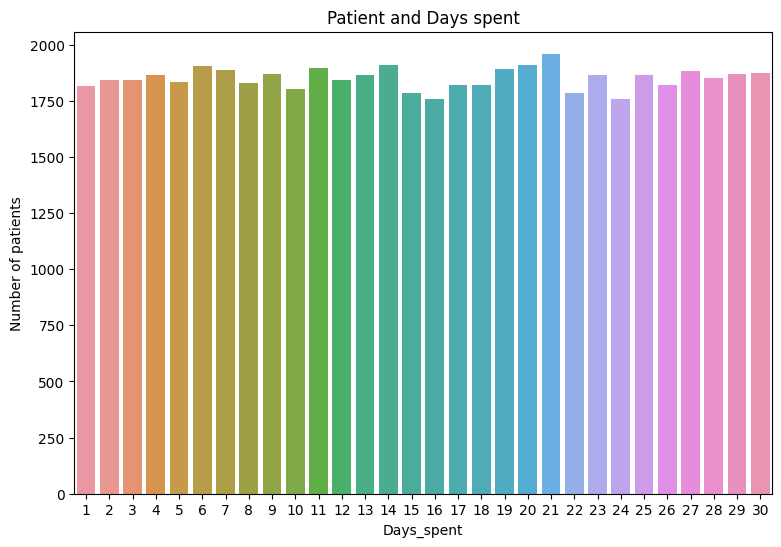

In [10]:
#days spent in the hospital
df['Date of Admission']=pd.to_datetime(df['Date of Admission'])
df['discharge_date']=pd.to_datetime(df['discharge_date'])
df['Days_spent']=(df['discharge_date']-df['Date of Admission']).dt.days
plt.figure(figsize=(9,6))
sns.countplot(x='Days_spent',data=df)
plt.ylabel('Number of patients')
plt.title("Patient and Days spent")
plt.show()

In [11]:
df.head(3)

,discharge_date,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Days_spent
0,2024-02-02,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,Paracetamol,Normal,2
1,2019-08-26,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,Ibuprofen,Inconclusive,6
2,2022-10-07,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,Aspirin,Normal,15


In [12]:
'''
Calculating the age group who suffer from cancer most
'''

'\nCalculating the age group who suffer from cancer most\n'

Medication
Lipitor        1922
Ibuprofen      1873
Paracetamol    1853
Penicillin     1793
Aspirin        1786
Name: count, dtype: int64


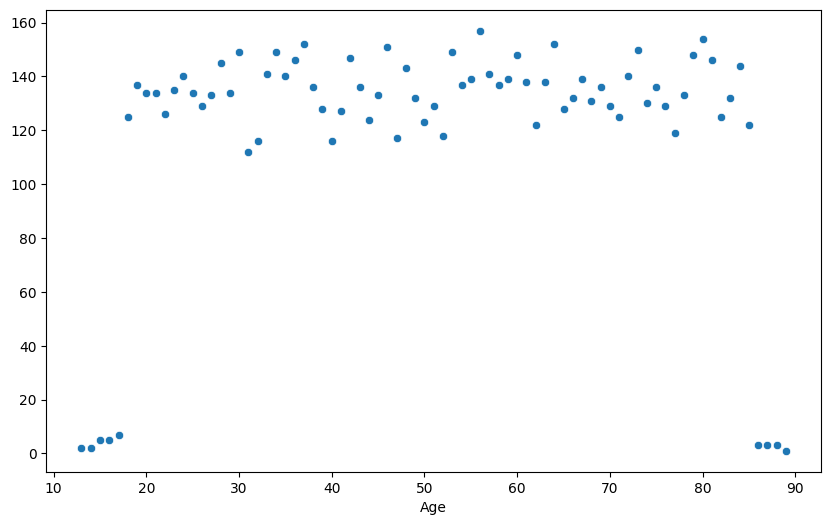

Age
56    157
80    154
64    152
37    152
46    151
     ... 
88      3
86      3
14      2
13      2
89      1
Name: count, Length: 77, dtype: int64


In [13]:
cancer_df=df[df['Medical Condition']=='Cancer']
age_counts=cancer_df['Age'].value_counts()
print(cancer_df['Medication'].value_counts())
plt.figure(figsize=(10,6))
sns.scatterplot(x=age_counts.index,y=age_counts.values)
plt.show()
print(age_counts)

In [14]:
df.head(3)
print(df['Medical Condition'].value_counts())

Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64


In [15]:

df.drop(columns=['Name','discharge_date','Date of Admission','Doctor','Hospital','Insurance Provider','Billing Amount','Room Number','Days_spent'])


,Age,Gender,Blood Type,Medical Condition,Admission Type,Medication,Test Results
0,30,Male,B-,Cancer,Urgent,Paracetamol,Normal
1,62,Male,A+,Obesity,Emergency,Ibuprofen,Inconclusive
2,76,Female,A-,Obesity,Emergency,Aspirin,Normal
3,28,Female,O+,Diabetes,Elective,Ibuprofen,Abnormal
4,43,Female,AB+,Cancer,Urgent,Penicillin,Abnormal
...,...,...,...,...,...,...,...
55495,42,Female,O+,Asthma,Elective,Penicillin,Abnormal
55496,61,Female,AB-,Obesity,Elective,Aspirin,Normal
55497,38,Female,B+,Hypertension,Urgent,Ibuprofen,Abnormal
55498,43,Male,O-,Arthritis,Elective,Ibuprofen,Abnormal


In [16]:

categorical_cols=['Medical Condition','Medication','Gender','Blood Type','Admission Type']
numeric_cols=['Age']
preprocessor=ColumnTransformer(transformers=[
    ('cat',OneHotEncoder(),categorical_cols),
    ('num','passthrough',numeric_cols)
])
models={
    'Gradient Boosting ':GradientBoostingClassifier(),
     'Logistic Regression':LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K Neighbors': KNeighborsClassifier(),
    'Support Vector Machines':SVC()
    
}
X=df.drop('Test Results',axis=1)
y=df['Test Results']

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=42)
for models, model in models.items():
    pipeline=Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('classifier',model)
       ])
    pipeline.fit(X_train,y_train)
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    y_pred=pipeline.predict(X_test)
    
    accuracy=accuracy_score(y_test,y_pred)
    
    print(f"Model: {models}")
    print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f}")
    print(f"Accuracy: {accuracy:.2f}")

Model: Gradient Boosting 
Cross-Validation Accuracy: 0.33
Accuracy: 0.34
Model: Logistic Regression
Cross-Validation Accuracy: 0.33
Accuracy: 0.34
Model: Decision Tree
Cross-Validation Accuracy: 0.34
Accuracy: 0.35
Model: Random Forest
Cross-Validation Accuracy: 0.35
Accuracy: 0.36
Model: K Neighbors
Cross-Validation Accuracy: 0.34
Accuracy: 0.34
Model: Support Vector Machines
Cross-Validation Accuracy: 0.33
Accuracy: 0.34


In [17]:
'''
Need some suggestions about using models 
'''

'\nNeed some suggestions about using models \n'

In [18]:
Arthritis_df=df[df['Medical Condition']=='Arthritis']
Diabetes_df=df[df['Medical Condition']=='Diabetes']
Hypertension_df=df[df['Medical Condition']=='Hypertension']
Obesity_df=df[df['Medical Condition']=='Obesity']
Asthma_df=df[df['Medical Condition']=='Asthma']



Arthritis_medi_counts=Arthritis_df['Medication'].value_counts()
Arthritis_test_result=Arthritis_df['Test Results'].value_counts()

Diabetes_medi_counts=Diabetes_df['Medication'].value_counts()


print(Diabetes_medi_counts)
print(Arthritis_medi_counts)
print(Arthritis_test_result)

Medication
Lipitor        1893
Penicillin     1881
Ibuprofen      1861
Aspirin        1858
Paracetamol    1811
Name: count, dtype: int64
Medication
Aspirin        1918
Paracetamol    1877
Penicillin     1866
Lipitor        1825
Ibuprofen      1822
Name: count, dtype: int64
Test Results
Abnormal        3188
Inconclusive    3088
Normal          3032
Name: count, dtype: int64
